# Pymaceuticals Inc.
---

### Analysis

In this analysis we look at pharmaceutical data for anti-cancer medications tested on mice. Three observations can be made: 
1. There is a strong correlation (.84) between mice weight and tumor volume size for mice on the Capomulin regimen
2. This study has a great mix of male vs female mice (50.6 Male and 49.4 Female) allowing for the study to equally show the effects on each sex 
3. Infubinol has an outlier which may result in further research to be done 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceutical_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
pymaceutical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
len(pymaceutical_data_complete["Mouse ID"].unique())

249

In [3]:
# Checking the number of mice.
Number_of_mice = pymaceutical_data_complete['Mouse ID'].nunique()
Number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = pymaceutical_data_complete[pymaceutical_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = pymaceutical_data_complete[pymaceutical_data_complete["Mouse ID"].isin(duplicate_mice_ids)== False]

duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#My orginal code below:
clean_dataframe = pymaceutical_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

#clean_dataframe

clean_dataframe = pymaceutical_data_complete[pymaceutical_data_complete['Mouse ID'].isin(clean_dataframe)==False]
clean_dataframe


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

# Drop rows with mouse ID 'g989'
clean_dataframe = clean_dataframe[clean_dataframe['Mouse ID'] != 'g989']

Clean_dataframe_Number_of_mice = clean_dataframe['Mouse ID'].nunique()
Clean_dataframe_Number_of_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume_for_each_regimen_mean = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_for_each_regimen_median = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_for_each_regimen_variance = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_for_each_regimen_stand_dev = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_for_each_regimen_sem = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_for_each_regimen = pd.DataFrame({
                                "Mean Tumor Volume": tumor_volume_for_each_regimen_mean,
                                "Median Tumor Volume": tumor_volume_for_each_regimen_median,
                                "Tumor Volume Variance": tumor_volume_for_each_regimen_variance,
                                "Median Tumor Std. Dev.": tumor_volume_for_each_regimen_stand_dev,
                                "Tumor Volume Std. Err.": tumor_volume_for_each_regimen_sem
                                }) 

tumor_volume_for_each_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Median Tumor Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_volume_for_each_regimen_agg = pymaceutical_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_for_each_regimen_agg.columns = ['Mean','Median','Variance','Std. Dev.','Sem'] 

tumor_volume_for_each_regimen_agg

,Mean,Median,Variance,Std. Dev.,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

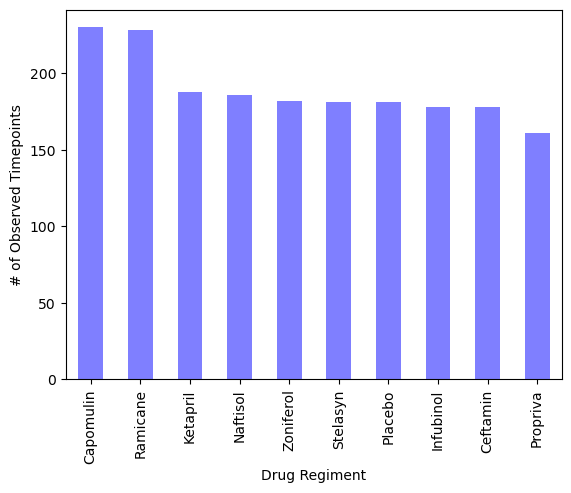

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Drug_Regiment_Table = pymaceutical_data_complete["Drug Regimen"].value_counts()

Drug_Regiment_Table.plot(kind= "bar", use_index=True, color='b', alpha=0.5,align="center", legend = False)

# Set the y-axis label
plt.xlabel('Drug Regiment')
plt.ylabel('# of Observed Timepoints')

plt.show()

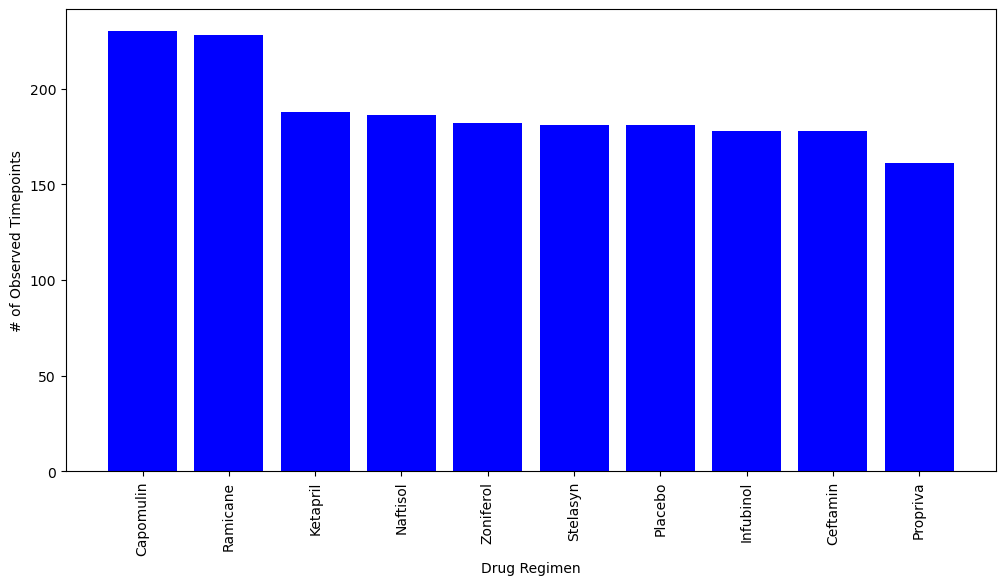

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regiment_Table_py = pymaceutical_data_complete["Drug Regimen"].value_counts()

# Create a bar plot using Pyplot
plt.figure(figsize=(12, 6))
plt.bar(Drug_Regiment_Table_py.index, Drug_Regiment_Table_py.values, color='Blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.xticks(rotation=90)
plt.show()


Sex
Male      958
Female    935
Name: count, dtype: int64

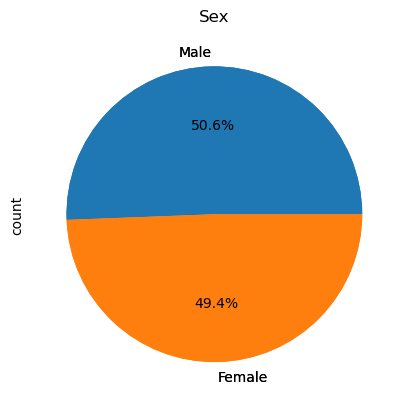

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = pymaceutical_data_complete

df = pymaceutical_data_complete["Sex"].value_counts()

plot = df.plot.pie(y="Sex")

plot = df.plot.pie(autopct="%1.1f%%")

plt.title("Sex")

df.head()

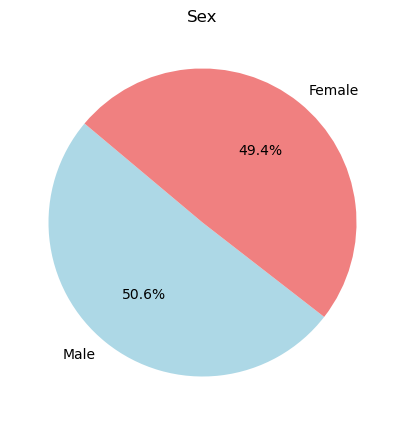

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_Table_py = pymaceutical_data_complete["Sex"].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(Gender_Table_py, labels=Gender_Table_py.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Get the last (greatest) timepoint for each mouse
last_timepoints = pymaceutical_data_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last timepoints with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, pymaceutical_data_complete, on=['Mouse ID', 'Timepoint'], how='left')

# Filter the merged data for the four specified treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)][['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

final_tumor_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,38.407618
7,a444,Ramicane,43.047543
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,31.896238
241,y865,Ceftamin,64.729837
245,z578,Ramicane,30.638696


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
        
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for each_treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == each_treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    #treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
    tumor_volume_data.append(tumor_volumes)

    # Calculate the quartiles
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]

    # Calculate the IQR
    IQR = upper_quartile - lower_quartile
                                                           
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * IQR
    upper_bound = upper_quartile + 1.5 * IQR

    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

#Print 
    print(f"{each_treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


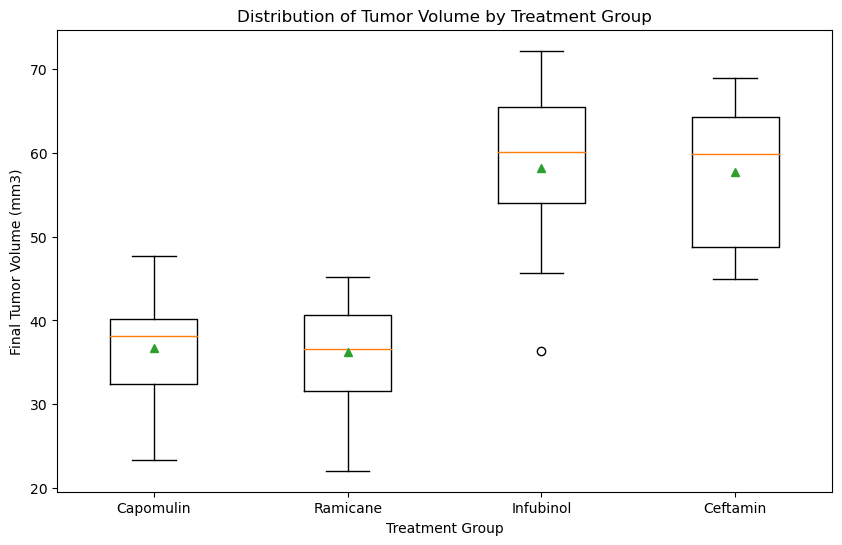

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

# Define the treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for each treatment group
tumor_volume_data_by_treatment = []

# Loop through each treatment regimen
for regimen in treatment_groups:
    # Filter the clean DataFrame for the current treatment regimen
    regimen_df = final_tumor_volumes[final_tumor_volumes["Drug Regimen"] == regimen]
    
    # Extract tumor volume data for the current treatment regimen
    tumor_volume_data = regimen_df['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volume_data_by_treatment.append(tumor_volume_data)

    
# Plot boxplots of tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data_by_treatment, labels=treatment_groups, showmeans=True)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
#plt.grid(True)
plt.show()

#tumor_volume_data_by_treatment



## Line and Scatter Plots

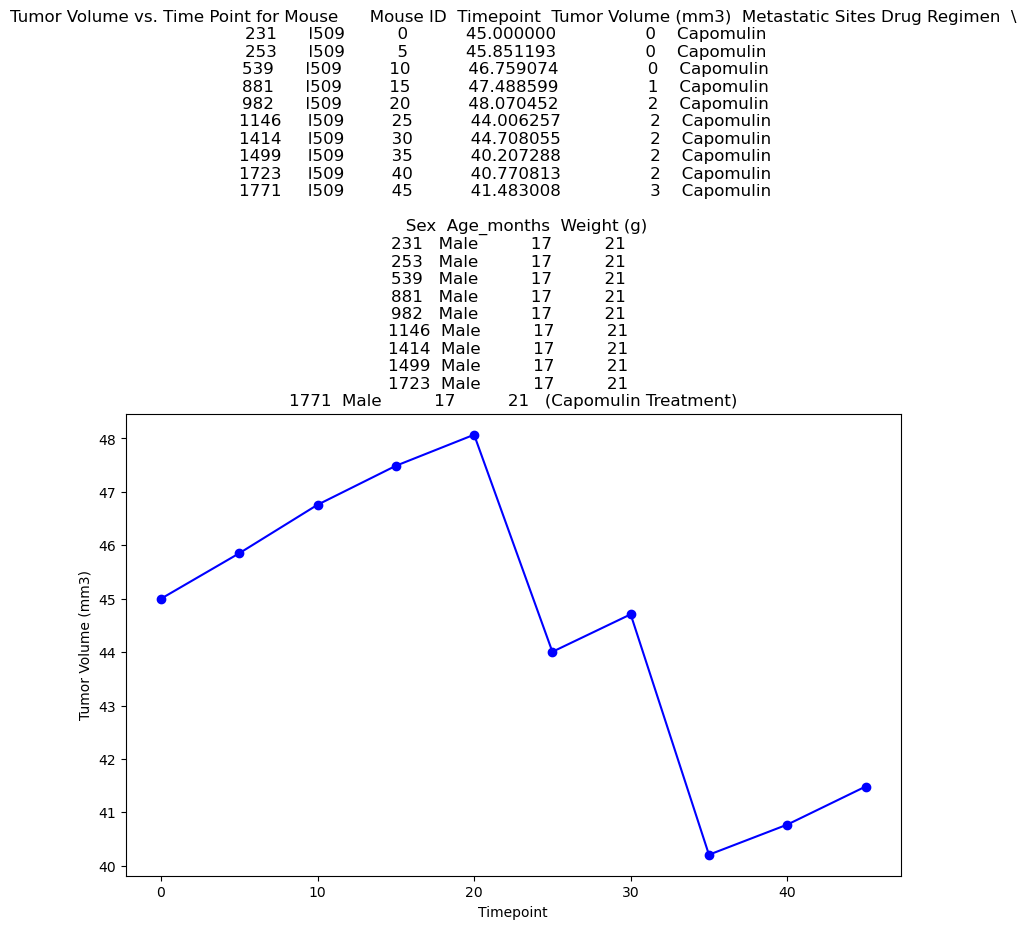

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for mice treated with Capomulin
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID treated with Capomulin # Choosing the first mouse for demonstration
single_mouse_id = capomulin_data.loc[capomulin_data['Mouse ID'] == "l509"] 

#single_mouse_id = capomulin_data['Mouse ID'].iloc[0]  # Choosing the first mouse for demonstration

# Filter data for the selected mouse
#single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == single_mouse_id]

# Step 3: Plot tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_id['Timepoint'], single_mouse_id['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
#plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
#plt.grid(True)
plt.show()

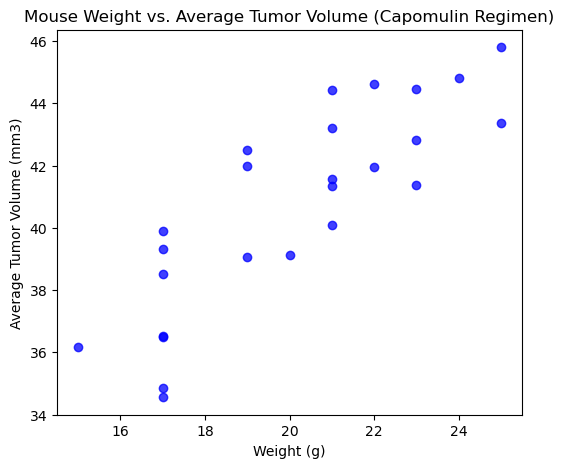

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

# Filter the data for mice treated with Capomulin
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Plot mouse weight vs. average tumor volume
plt.figure(figsize=(6, 5))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)
plt.show()


## Correlation and Regression

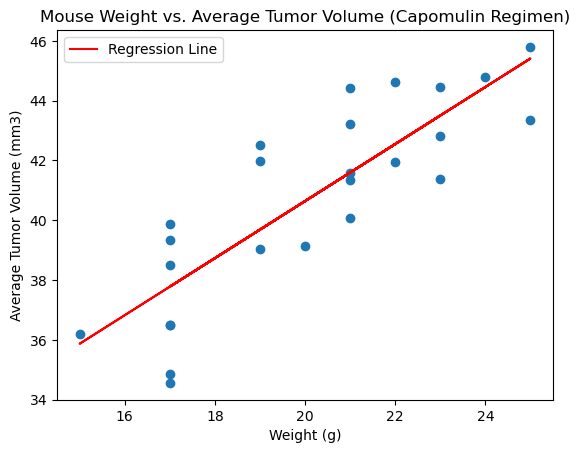

The correlation between mouse weight and the average tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr, linregress
import numpy as np

# Calculate the correlation coefficient and fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)

# Plot the scatter plot and the regression line
plt.scatter(mouse_weights, avg_tumor_volume)
line = slope * mouse_weights + intercept
plt.plot(mouse_weights, line, 'r-', label='Regression Line')

# Add labels and show the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.show()

# Print the correlation coefficient
correlation_coefficient = r_value
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')
